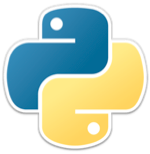


# Python Coding Club

This series is to introduce Python as a programming language to be used for data analysis, scientific computing and plotting. It is by __no means comprehensive__ but will provide a basis for further investigation and exploration into this powerful language. These notes are __best visualised__ in a __Jupyter Notebook__ and I encourage you to __follow along__ in your __preferred IDE__.

# Part 5: Classes

Part 5 of this series will focus on another useful concept, **classes**. Whilst classes are very useful they might not seem useful at first glance, however, as your program/analysis becomes more complex, your program may benefit from encapsulating similar sets of functions as a class.

In any case, understanding classes will be highly useful when utilising imported external libraries/modules to understand their documentation.

## Part 5.0 Introducing classes

**Classes** are simply an **object type**. This essentially means what type of object a variable is.

For instance, the variable `var` below is of **type** or `class` `str`. 

Similarly for **another** variable called `var2`, it is also has the `class` `str`. 

The two objects are separate objects, but have the same `class`.

In [1]:
var = 'This is a string'
var2 = "this is another string"
print(type(var))
print(type(var2))

<class 'str'>
<class 'str'>


Therefore essentially a class is a **type** of object. 

In Python, there are many types of object already available, i.e. `str`, `int`, `float`, `complex`, `list`, `tuple`, `dict`, `function` are all different **types** of object, or different **classes**. 

However, it is also possible to **define your own class**, meaning you can create an **object type**. 

This is incredibly powerful if you want to **do multiple different things** with a variable.

What I mean by this, is that if you only require a value or an action to occur, using **functions** is sufficient. However if you find yourself trying to chain multiple functions together (i.e. using the output of one functions as the input of another or something similar) or if you need a variable that requires multiple things that you can **do** to it, consider defining a class for it.

### Class keyword

If it seems a bit confusing at first, hopefully working through this part will make the concept of **classes** more clear and highlight how they can be used. 

Firstly, lets begin by defining our own `class` using the `class` keyword.

In [2]:
class Person:
    pass

steve = Person()
print(type(steve))


<class '__main__.Person'>


The `pass` keyword is simply a placeholder, definitions like `if`, `class`, `def`, etc cannot be **empty** so the `pass` keyword simply **does nothing**.

Here we have created the `Person` **class**. Class definitions are typically **capitalized**, they do not have to be, but most often they are capitalized. Therefore when using an external module, it is useful to remember that if a piece of code from that module starts with a capital letter, it is most likely a `class`. 

We assign the variable `steve` to be a `Person` object via the parentheses after `Person`. This **calls** (hence the parentheses) the **initializer method** from the `Person` class. Since the `Person` class does not currently have any **methods** associated with it, the parentheses are empty. More on initializer methods soon.

The `'__main__.Person'` part of the print statement simply refers to where the `Person` class has been defined, which, since we are running the code from this file and this is where the `Person` class is defined, it refers to the **main** (`__main__`) program. 

If we were importing the class in from another Python file/external library, it would have the filename from where the `class` definition was.

## Part 5.1: Attributes

Classes can store variable names and values that are specific to that object type. These are called **attributes** of the object. 

It is useful to think of attributes of a class as things that the object **has**. For instance a `Person` may **have** an `age`, an `eye_color` or a `height`. **Attributes** belong to the object.

Attributes are accessed using the dot notation i.e. `<object>.<attribute>`. Concretely the dot notation refers to the **namespace** of the class, i.e. accessing the **local** variables and functions of that class. This is further explained when importing external libraries in part 6.

In [3]:
class Pizza:
    topping = 'pepperoni'
    
pizza1 = Pizza()

print(pizza1.topping)

pepperoni


Trying to access an attribute that does not exist **raises** an `AttributeError`.

In [4]:
print(pizza1.cheese)

AttributeError: 'Pizza' object has no attribute 'cheese'

This error explains that the `Pizza` object `pizza1` does not have an attribute named `cheese`. 

Class attributes are available to be accessed by any objects of that **class**. 

In [5]:
pizza2 = Pizza()

print(pizza2.topping)

pepperoni


Notice as well that in the dot notation for attributes, there is no parentheses, that is because you are simply accessing a variable, **not calling a function/method**.

Class attributes are accessible from **every object of that class**. Changing the class attribute for an instance object does not change it for other objects.

In [6]:
pizza1.topping = 'mushroom'
pizza3 = Pizza()

print(pizza3.topping)
print(pizza1.topping)

pepperoni
mushroom


However, accessing the class attribute itself from the class definition, will change all subsequent attributes:

In [7]:
Pizza.topping = 'cheese'
pizza4 = Pizza()

print(pizza1.topping)
print(pizza4.topping)

mushroom
cheese


As you can see, the attribute for `pizza1` remained as `mushroom` since the object was created before we changed the `Pizza.topping` attribute directly. 

Classes have **special** methods and **attributes** indicated by a double underscore either side of the name, i.e. `__dict__`. The special class attribute `__dict__` holds all the attributes associated **with that object** in a dictionary format, hence the `dict` part, for instance:

In [8]:
print(pizza1.__dict__)

{'topping': 'mushroom'}


In [9]:
pizza1.topping2 = 'ham'
print(pizza1.__dict__)

{'topping': 'mushroom', 'topping2': 'ham'}


The second code snippet shows that you can **create object attributes** simply by accessing the **namespace** of the object and setting a new attribute to a specific value.

Of course this works on the class level as well as the object level.

In [10]:
Pizza.cheese_type = 'mozzerella'

print(Pizza.__dict__)

{'__module__': '__main__', 'topping': 'cheese', '__dict__': <attribute '__dict__' of 'Pizza' objects>, '__weakref__': <attribute '__weakref__' of 'Pizza' objects>, '__doc__': None, 'cheese_type': 'mozzerella'}


Amongst the output, we can see `'topping': 'cheese'` and `'cheese_type': 'mozzerella'` showing the class attributes.

Trying to access the class attributes in this way from an individual object returns an empty `dict` if the attributes have not been specified. This is because the **object** does not have these attributes, and executing `pizza5.cheese_type` is actually pointing to the `Pizza.cheese_type` so it is actually an attribute of `Pizza` that is returned. 

This is different for `pizza1` since we explicitly assigned `pizza1.topping` causing `pizza1.topping` to be assigned a new value not `Pizza.topping`. Thus the `pizza1.topping` has its own attribute.

In [11]:
pizza5 = Pizza()

print(pizza5.__dict__)
print(pizza5.cheese_type)

{}
mozzerella


This can be useful however, as dictionaries have an `dict.update()` method which can be used to set multiple attributes of `obj.__dict__.update()` all at once by passing a new dictionary into the `.update()` call.

## Exercise 5.1: Class attributes

In this exercise, we will be creating a `Planet` class with attributes `radius`, `mass`, `water`, `tilt`, `orbit_time` and `gravity`.

Set the variables to `radius = 6371`, `mass = 5.972e24`, `water = True`, `tilt = 23.5`, `orbit_time = 365`. Set the `gravity` attribute to the gravitational field strength via the equation:

$$
g = \frac{GM}{r^2}
$$

Where $G$ is the universal graviational constant, i.e. `6.67e-11`. 

Create a `Planet` object called `earth` and another called `mars`. Set the attributes of `mars` to the correct values for mars and print them.

First write the name of the attributes and their values in the `Planet` definition. Create a `Planet` object called `earth` and another called `mars`. 

Try setting each attribute of `mars` to the correct values (a quick Google search can find everything). Print the values of `mars.radius` and `earth.radius`. Print other attributes of `mars` and `earth` to familiarise yourself with the notation. 

Lastly, print the percentage of Earths gravity that Mars is (i.e. the ratio of their gravitational field strengths).

**Bonus**: Try updating all of the attributes of `mars` at once by utilising the `__dict__.update()` method.

**Hint**: The `Planet` class can use its attributes when assigned to determine other attributes, i.e. it can use the radius and mass to determine the gravity. However, remember this is simply a number, therefore when assigning `mars`'s mass and radius, you will need to update it's gravity too. 

In [ ]:
class Planet:
# -------------------------------------------------------------------------
# DEFINE PLANET ATTRIBUTES
    
    
    
    
    
    
# -------------------------------------------------------------------------
# CREATE PLANET OBJECTS



# -------------------------------------------------------------------------
# UPDATE MARS ATTRIBUTES



# -------------------------------------------------------------------------
# PRINT ATTRIBUTES, INCLUDING PERCENT OF GRAVITATIONAL STRENGTHS



## Part 5.2: Initialising objects

In the previous exercise, manually assigning each of the class attributes to a new object is lengthy, and in fact `earth` would not **have** any actual attributes itself, instead it simply points towards the attributes of `Planet` when `earth.<attribute>` is typed. 

Instead **classes** have a **special method** called the `__init__()` function/method. This is used to initialise specific objects upon construction with specific values.

The `__init__()` function is an internal method which is called upon **constructing the object**. The parameter `self` is a reference to the object being created. 

This is incredibly similar to simply typing code out through setting class attributes, for instance, if I created a `Person` object from the class defined at the beginning.

In [12]:
Dan = Person()

Calling the `Person()` constructor with no arguments is due to their being no `__init__` method for `Person` (see above). 

`Dan` is now a `Person` object, but with no attributes. Instead I can define attributes by going:

In [13]:
Dan.gender = 'male'
Dan.age = 23 
Dan.height = "5'10"
print(Dan.age)

23


This has **created** attributes for the `Dan` object. However contrast this to the below code for a `Person_1` class. 

In [14]:
class Person_1:
    def __init__(self, gender, age, height):
        self.gender = gender
        self.age = age
        self.height = height

This `class` has the `__init__()` method, which is used when constructing the class.

Now when creating a `Person_1` object, instead of leaving the parentheses with no arguments, we pass in arguments for the `gender`, `age` and `height`. The `self` parameter is a reference to the object itself, more on this soon. 

These attributes are **object** or **instance** attributes as they only belong to **instances** or **objects** of the class, not the class itself. 

This can be shown by:

In [15]:
print(Person_1.age)

AttributeError: type object 'Person_1' has no attribute 'age'

As you can see the `Person_1` class has no `age` attribute itself, however an **instance** or **object** of the `Person_1` class does.

Now when typing the below code:

In [16]:
Dan_1 = Person_1('male', 23, '5\'10')
print(Dan.age)

23


It is clear that passing the parameters in in the constructor has behaved the way we expect. 

Concretely, when creating the object, the `__init__()` method is **called** hence the parentheses, however when there is no `__init__()` method defined, it simply reverts to a default `__init__()` method which simply contains `pass`, i.e. it does nothing. 

When explicity writing an `__init__()` method, it passes the **object created** (`self`) into the method, and then **sets the attributes according to the assignments in the method**. 

For instance, creating a `Person` object called `Dan` and then typing `Dan.age = 23` is the same as creating a `Person_1` object with the `age` argument as `23` since the `__init__()` method then sets `self.age = 23` which is the same as above.

Similarly, now that `Person_1` has an `__init__()` method with arguments, like any function, it requires those arguments to be positionally in place to execute, the following code for instance with receieve a `TypeError` as there are now missing positional arguments.

In [17]:
Steve = Person_1()

TypeError: __init__() missing 3 required positional arguments: 'gender', 'age', and 'height'

Therefore concretely, `__init__()` is simply a function that **belongs** to the `Person_1` class and therefore requires the correct number of arguments to be passed like any function. 

## Exercise 5.2: Initialising objects

**i).**

In this exercise, you will create an `Animal` class that takes `colour`, `kind`, `diet` and `name` as parameters to the `__init__()` function. Then save these parameters as **object attributes**.

Then see if your class has worked correctly by executing the cell below.

**Hint**: Remember the first parameter to the `__init__()` method is a reference to the object itself, normally called `self`.

In [ ]:
class Animal:
# -------------------------------------------------------------------------
# CREATE INIT METHOD WITH APPROPRIATE PARAMETERS AND SAVE TO *OBJECT* ATTRIBUTES.
    def __init__():
        
        
        
# -------------------------------------------------------------------------

In [ ]:
lion = Animal('beige', 'mammal', 'meat', 'Lion')
elephant = Animal('grey', 'mammal', 'plants', 'Elephant')
python = Animal('green', 'reptile', 'insects', 'Python')

for animal in [lion, elephant, python]:
    print(animal.__dict__)

**ii). Harder**

In this exercise, we will create a `PolarPosition` class which takes parameters `x`, `y` and `z` in cartesian coordinates in the `__init__()` function. 

A `PolarPosition` object then has attributes `r`, `theta` and `phi` based on the following equations:

$$
x = r\sin(\phi)\cos(\theta)\\
y = r\sin(\phi)\sin(\theta)\\
z = r\cos(\phi)
$$

After creating the class, create to `PolarPosition` objects with `pos1 --> x = 2, y = 3, z = 10` and `pos2 --> x = 5, y = 3, z = 1`, then run the code below. 

Check your class works as desired by using this [polar coordinate calculator](https://keisan.casio.com/exec/system/1359533867). This link also contains the conversion of the coordinate bases. 

**Hint**: Work out how to return `r`, `theta` and `phi` from `x`, `y` and `z` and have them saved as attributes. A quick Google search will find how to convert these two coordinate bases if you are struggling. **Don't forget** that the first parameter to the `__init__()` method is a reference to the object itself, normally denoted `self`. Pythons `math` module is imported so that `sin` etc functions can be used including `sqrt()`. The `sin()` and other trigonmetric functions use **radians** so keep that in mind when checking your answer. 

In [ ]:
from math import sin, asin, cos, acos, tan, atan, sqrt 
# Needed to use sin(), cos(), tan() and their inverses (asin() etc.)

class PolarPosition:
# -------------------------------------------------------------------------
# CREATE INIT METHOD WITH APPROPRIATE PARAMETERS AND SAVE TO *OBJECT* ATTRIBUTES.



# -------------------------------------------------------------------------
# CREATE TWO PolarPosition OBJECTS WITH APPROPRIATE PARAMETERS.
pos1 = PolarPosition()
pos2 = PolarPosition()
# -------------------------------------------------------------------------

# For each PolarPosition object print their attributes.
for pos in [pos1, pos2]:
    print(pos.__dict__)

**In summary** class **attributes** are available to all object instances, however **object attributes** are specific to that object. 

One thing to note, is that if a **class attribute** is a **mutable** object such as a list, **if one object changes the class attribute, the change is present for ALL objects of that class**. 

For instance if I create a `Coffee` class that takes the `name` of who's coffee it is.

If I create a class attribute called `additives` that is a list to hold the `additives` to add to the `Coffee`, i.e. whether someone wants `'milk'`, `'sugar'` etc. 

I can then change this using the list **method** `.append()`.

In [18]:
class Coffee:
    ingredients = ['beans', 'water']
    def __init__(self, name):
        self.name = name

In [19]:
Dans_coffee = Coffee('Dan') # Dans coffee
Nicoles_coffee = Coffee('Nicole') # Nicoles coffee

Nice_additives = ['oat milk', 'cinnamon']

for additive in Nice_additives:
    Dans_coffee.ingredients.append(additive) # Adding additives to Dans coffee.

print(Dans_coffee.ingredients)

print(Nicoles_coffee.ingredients)

Coffee.ingredients.append('sugar')
print(Dans_coffee.ingredients)

# Only Object attribute of 'Dans_coffee' is the 'name'.
print(Dans_coffee.__dict__)

['beans', 'water', 'oat milk', 'cinnamon']
['beans', 'water', 'oat milk', 'cinnamon']
['beans', 'water', 'oat milk', 'cinnamon', 'sugar']
{'name': 'Dan'}


As you can see I have successfully added `'oat milk'` and `'cinnamon'` to `Dans_coffee` but these have also been added to `Nicoles_coffee`. 

**Oops. This would not be good**. 

Using an **object attribute** instead (`self.ingredients = []`) when it is mutable would negate this problem. However this feature can be useful if all `additives` of each `Coffee` object needed to be updated all at once. If this is your aim, its best to avoid confusion and quote the class itself rather than an object of the class by simply using the line `Coffee.ingredients.append()` as you can see at the bottom with `'sugar'`.

In [20]:
class Coffee:
    ingredients = ['beans', 'water']
    def __init__(self, name):
        self.ingredients = self.ingredients+[]
        self.name = name

**Note** this is the same as writing `self.ingredients = ['beans', 'water']` in the `__init__()` method.

This way we can use `ingredients` that are the same for every `Coffee` object, and set them equal to an **object attribute** called `ingredients` that are specific to each instance. 

The specific `ingredients` for each `Coffee` are both the `ingredients` for a basic coffee. These can then be **appended** without changing any `ingredients` for another `Coffee` since it is now an **object attribute**. 

In [21]:
Dans_cof = Coffee('Dan')
Nicoles_cof = Coffee('Nicole')

Dans_cof.ingredients.append('oat milk')

for cof in [Dans_cof, Nicoles_cof]:
    print(cof.ingredients)


['beans', 'water', 'oat milk']
['beans', 'water']


However, if we needed to update all the ingredients for all `Coffee` objects this would no longer work, since we have changed `Dans_cof.ingredients` to an **object attribute** rather than a **class attribute**. 

In [22]:
Coffee.ingredients.append('sugar')

print(Dans_cof.ingredients)

['beans', 'water', 'oat milk']


This could still be achieved by separating the base ingredients and additives and adding in a **method** for updating the ingredients.

In [23]:
class Coffee:
    ingredients = ['beans', 'water']
    def __init__(self, name):
        self.name = name
        self.ingredients = Coffee.ingredients+[] # Without the empty list, the object attribute would point to the 
                                                 # class attribute.
    def update_ingredients(self):
        # Finds components in the ingredients of the coffee that are not present in the class attribute.
        additives = [additive for additive in self.ingredients if additive not in Coffee.ingredients]
        self.ingredients = Coffee.ingredients+[]
        for additive in additives:
            self.ingredients.append(additive)

In [24]:
dans_coffee = Coffee('Dan')
nicoles_coffee = Coffee('Nicole')

# Update just Dans coffee with oat milk and cinnamon
dans_coffee.ingredients.append('oat milk')
dans_coffee.ingredients.append('cinnamon')
print(dans_coffee.ingredients)
print(nicoles_coffee.ingredients)

# Update Coffee class ingredients with 'sugar'
Coffee.ingredients.append('sugar')

# Call '.update_ingredients()' on the Coffee objects
dans_coffee.update_ingredients()
nicoles_coffee.update_ingredients()

# New ingredients for the Coffee objects.
print(dans_coffee.ingredients)
print(nicoles_coffee.ingredients)

['beans', 'water', 'oat milk', 'cinnamon']
['beans', 'water']
['beans', 'water', 'sugar', 'oat milk', 'cinnamon']
['beans', 'water', 'sugar']


## Part 5.3: Class methods

We've now covered **class attributes** and **object attributes** and when they are suitable to be used. 

In this section we shall cover **methods**. 

If **attributes** are things the object **has** then **methods** are things the object can **do**. 

Concretely, **methods** are simply **functions** that **belong to an object**. 

We have actually already come across **methods** before, for objects such as `list`, `tuple`, `dict` and `str` objects. 

To create a method, simply utilise the `def` keyword for creating functions inside the *namespace* or *scope* of the class. In fact, the `__init__()` method is just that, **a method**. However the double underscores for the `__init__()` method make it a **special method**, normal methods can be named anything, just like functions.

The first parameter for any **method** is always a reference to the object itself typically denoted by `self`. Although it is possible to name it anything you would like, it is much easier for other programmers to read your code well if you stick with the `self` convention. Most IDE's actually automatically type `self` when defining **methods** in a class anyway.

Concretely, calling `object_name.method_name(args)` is the same as typing `Class_name.method_name(object name, args)` 

i.e. calling a method of an object **calls** the **class method** with the first parameter as the object to act on. 

Like attributes, methods are accessed via dot notation or *entering the class namespace* to be exact.

In [25]:
class Human:
    def __init__(self, age):
        self.age = age
        
    def ageByOneYear(self):
        self.age += 1

Here we define a `Human` class with the **method** called `ageByOneYear`. This method updates the objects `age` attribute by 1.

In [26]:
Dan = Human(23)
Dan.ageByOneYear()
print(Dan.age)

24


Sadly this ages the `Dan` object by one year. 

Like any functions, methods can take varying numbers of parameters:

In [27]:
class Human:
    def __init__(self, age):
        self.age = age
        
    def ageBy(self, num_years=1):
        self.age += num_years

In [28]:
Dan = Human(23)
Dan.ageBy(10)
print(Dan.age)

33


And also methods can **call** other methods.

In [29]:
class Human:
    def __init__(self, age, hair_length):
        self.age = age
        self.hair_length = hair_length
        self.haircuts = 0
        self._cutHair()
        
    def timeToPass(self, num_days):
        for d in range(0, num_days):
            self.age += 1/365
            self.hair_length += 0.5
            self._cutHair()
    
    def _cutHair(self):
        if self.hair_length > 30:
            self.hair_length = 5
            self.haircuts += 1
    

In [30]:
Dan = Human(23, 35)
Dan.timeToPass(365)

print(Dan.hair_length)
print(Dan.haircuts)

9.0
8


Here we define the `Human` as having a `hair_length` and `age`. 

Then the `_cutHair` method is invoked at the end of the `__init__()` function to determine whether the `Human` needs a haircut. If the hair length is over 30, then the hair is cut to 5, and the number of haircuts increases by 1. 

After making the `Human` age by `num_days`, for each each that passes, the age increases by one day, and the `hair_length` increases by 0.5. At each day, the `_cutHair` method is invoked **by** the `timeToPass` method to determine if the `Human` needs a haircut.

The use of the singular underscore for the `_cutHair` method is another convention of Python programmers. The underscore for methods typically means that it is not supposed to be accessed outside of class itself. 

For instance, we have utilised the `Dan.timeToPass` method in the main program, which executes the `_cutHair` method, but we have not explicitly used the `Dan._cutHair` method ourselves.

You may ask why not simply write the code for `_cutHair` in the `timeToPass` method, and yes, this would be valid. However, consider that there are multiple **methods** that require the use of `_cutHair`, i.e. a `daysToPass`, `yearsToPass` or even `suddenHairGrowth` **methods**. These may all seperately require the `hair_length` to be checked. Therefore for ease of code reusability we would like to encapsulate that functionality into a its own method, but we do not want the method to be directly accessible so we use the singular underscore.

In reality, there is no such thing as **private methods** or **private attributes** in Python like there is in other programming languages such as Java, and therefore methods or attributes that start with an underscore **can** be directly accessed, it is just universally accepted by Python programmers that **they should not be** to avoid confusion or unexpected behaviour.

This is useful to note when using external libraries. 

Methods do not have to be **called** directly and can be saved as a variable, for instance:

In [31]:
func1 = Dan.timeToPass

func1(365)
print(Dan.age)

24.999999999999424


Here we do not actually **call** the `Dan.timeToPass` method, instead we save it in `func1` which is now a **callable variable**. Then we **call** `func1` with the correct number of arguments for the **method**. Printing the `age` of `Dan` afterwards shows that `func1` did infact update `Dan.age` like it should have.

As with normal functions, **methods** can be written to do whatever you like. Object attributes can also be set with outputs of internal class methods by assigning the a variable to the method call and by having the `return` keyword in the **method** to return a value. 

For instance:

In [32]:
class LinearModel:
    def __init__(self, m, c):
        self.params = [m, c]
    
    def evaluate(self, x):
        return self.params[0]*x + self.params[1]
    

x = [1,2,5,6,3,6,4,6]
l1 = LinearModel(3, 2)

predicts = list(map(l1.evaluate, x))
print(predicts)

[5, 8, 17, 20, 11, 20, 14, 20]


Here we have created a `LinearModel` with the initialised parameters of `m` and `c` and saved them in the object attribute `self.params`. The **method** `evaluate()` takes the `x` position to evaluate the model at and returns the value for that linear model at position `x`. 

Given the `x` list of data, we can create a `LinearModel` object, and call its `.evaluate()` on each element of `x` using the `map()` function. Printing the list of the `map()` object shows the LinearModel acting on each element of `x` to produce a list of `y` values which are saved in the variable `predicts`.

Nothing in the `l1` object has changed, we simply returned a value from its method and saved it to a variable outside of the `l1` object.

This is similar to how we defined functions inside of functions in Part 4, but can allow for much more functionality. Before we could return a singular function from inside of a function by defining an inner function inside the definition for the outer function. In fact we could have defined more functions inside a singular function however this can get difficult to read. Luckily utilising **classes** and class **methods** in this way is a much simpler way of applying multiple functionality to a singular object by simply defining new **methods**. 

### Aside: docstrings

A slight aside before the next exercise is on **docstrings**. Docstrings are simply multiline comments started by a `"""` triple quotation mark below either a function or class definition. Docstrings only use is to provide information to a user on what the function or class does. A docstring for any function or class can be accessed by passing the class or function name into the `help()` function.

In [33]:
def a_function():
    """
    This function does nothing in particular.
    """
    return None

# Calling the docstring for the a_function.
print(help(a_function))
# Calling the docstring for the function `print`.
print(help(print))

Help on function a_function in module __main__:

a_function()
    This function does nothing in particular.

None
Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.

None


This can provide information on the type of arguments the function/class takes and its intended use, including what it returns.

## Exercise 5.3: Methods

In this exercise, we will be expanding on the previous exercises in part 4 and the `LinearModel` shown above to add a method to evaluate the mean sum of squarred errors for a `LinearModel` object. 

$$
h(x) = mx + c
$$
 
Set the parameters `m` and `c` to object attributes and complete the `evaluate`, `meanSquaredError` and `predict` and `update_model` **methods** consistent with their **docstrings**.

Remember, methods can call **other methods** in the class, allowing you to easily seperate code out.

As a reminder, the mean squared error equation is:

$$
R = \frac{1}{N}\sum\limits_{i=0}^{N}{(y_i - h(x_i))^2}
$$

**Bonus** see if you can complete each function in a singular line of code. The `meanSquaredError` and `predict` methods will require list comprehensions to achieve this.

In [ ]:
class LinearModel:
    """
    Creates a LinearModel object.
    """
    def __init__(self, c, m):
        """
        Initialises a LinearModel object with attributes equal to c and m.
        """
    # -------------------------------------------------------------------------
        

    # -------------------------------------------------------------------------
    
    def evaluate(self, x):
        """
        Method that takes a numeric argument 'x' and returns the value h for h(x) = m*x + c
        """
    # -------------------------------------------------------------------------
        
        
    
    # -------------------------------------------------------------------------
    
    def meanSquaredError(self, x, y):
        """
        Method to produce the mean squared error between the evaluated LinearModel (h(x)) and the observed values y
        for each value in 'x' and 'y' to return the meanSquaredError.
        Takes two arguments, the 'x' and the 'y' lists of data.
        """
    # -------------------------------------------------------------------------
        
        
    
    # -------------------------------------------------------------------------
    
    def predict(self, x):
        """
        Predict method to take a list of 'x' data and evaluate the LinearModel on each element in the 'x' list.
        Returns a list of 'h(x)' predicted values.
        """
    # -------------------------------------------------------------------------
        
        
    
    # -------------------------------------------------------------------------
    
    def update_model(self, c, m):
        """
        Update model simply used to reassign the slope and intercept values of the LinearModel object to 
        'm' and 'c' arguments respectively.
        """
    # -------------------------------------------------------------------------
        
        
    
    # -------------------------------------------------------------------------

# Dataset
x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
y = [3.2, 5.6, 8.0, 10.2, 11.8, 15.0, 17.3, 19.3, 21.6, 24.2, 26.5]

# For visualisation of results.
%matplotlib inline       
import matplotlib.pyplot as plt
plt.plot(x, y, 'r.', label='y')
plt.xlabel("x")
plt.ylabel("y")

# LinearModel object generation.
linear = LinearModel(0, 1)

# Obtaining values from the linear object methods.
meanSquaredError = linear.meanSquaredError(x, y)
predicitions = linear.predict(x)

# Visualising initial model.
plt.plot(x, linear.predict(x), 'k:', label='initial model')

# Printing formatted values.
predicitions = [float('%.1f'%pred) for pred in predicitions]
print(f'Parameters: {linear.__dict__}')
print(f'Mean Squared Error:\t{meanSquaredError:.4f}')
print(f'y:\t\t{y}')
print(f'predictions:\t{predicitions}\n')

# -------------------------------------------------------------------------
# Play around with the parameters of the LinearModel, see what predictions you can get out.

linear.update_model(5, 8)

# -------------------------------------------------------------------------

# Obtaining values again.
meanSquaredError = linear.meanSquaredError(x, y)
predicitions = linear.predict(x)

# Visualising updated model.
plt.plot(x, linear.predict(x), 'm-', label='updated model')
plt.legend()

# Printing updated model values.
predicitions = [float('%.1f'%pred) for pred in predicitions]
print(f'Parameters: {linear.__dict__}')
print(f'Mean Squared Error:\t{meanSquaredError:.4f}')
print(f'y:\t\t{y}')
print(f'predictions:\t{predicitions}')

I hope it is clear that **methods** are things that you can **do** to an object and can come in very handy when your programs get larger and require common functionality across different variables. 

If you find yourself constantly needing your variable to **do something** it may be worth considering refactoring your code into making a `class` that has **methods** that act on those objects. 

## Part 5.4: Special methods

This part is briefly on **special methods** that are indicated by double underscores. 

One such method we have encountered before `__init__` method that initialises an object instance. Note, to use these methods, they **must be called the name given**. For instance typing `__initialise_method__` will **NOT** work the same as the `__init__` method, hence they are **special methods**.

Special methods such as `__init__` invoke special functionality of the object. 

For instance the `__call__` method is invoked when an object is used like a function. 

In [34]:
class A:
    def __init__(self, val):
        self.val = val
    
    def __call__(self, val):
        print(self.val+val)

obj = A(4)
print(callable(obj))
print(type(obj))

obj(5)

True
<class '__main__.A'>
9


Here after creating a `__call__` method, we can use the object like a function, it is still an `A` object, however now it is **callable**. When creating a class, the `__call__` method is not present, i.e. the class cannot be called, however by defining a `__call__` method, it can. This is particularly useful when creating models.

In [35]:
class CoeffMultiply:
    def __init__(self, *coeffs):
        self.coeffs = coeffs
    
    def __call__(self, x):
        return sum([coeff*x for coeff in self.coeffs])
    
f = CoeffMultiply(3, 5, 6)

val = f(4)
print(val)

56


Here we create a class called `CoeffMultiply` and then created an object called `f`. We can then return values by using the `__call__` method by simply calling the `f` object using `f(4)`. Of course the same rules for functions apply, there needs to be the correct number of arguments passed to `f` etc. 

**Callable** objects can also be called from **inside a method** by simply referencing the object with `self()`. This will trigger the `__call__` method on the object. 

You may have noticed that the `evaluate()` function in the previous exercise could easily have been written as a `__call__` method, replacing `self.evaluate()` calls with `self()` calls instead. This is exactly when you would use the `__call__` method.

Other special methods exist for numerous different operators and in-built functions as well.

For instance the `__add__` method determines what happens when the `+` operator is used on an object.

This is where it is useful to explain about the `raise` keyword. The `raise` keyword is used to **cause** an exception/error to **raise an error** if something about the usage of a function or class you have defined is not correct.

For instance, if I define the method `__add__` for the `LinearModel`, what should it do? If I add two LinearModels together should the result be a LinearModel with average parameters or should they be summed? What if I was to add a floating point number to a LinearModel? Should all the parameters increase? Should the intercept simply increase?

In my mind, if two LinearModels were added together the result should be a LinearModel with the intercepts added and the slopes added.
If a floating point or integer number were added to a LinearModel, only the intercept should be updated, likewise a LinearModel is multipled by a number, the slope should be scaled accordingly. 

Whether or not these implementations are the 'correct' interpretation simply does not matter. With **special methods** I can determine what the action is when these operators are used.

In [36]:
class LinearModel:
    def __init__(self, c, m):
        self.intercept = c
        self.slope = m
        
    def __call__(self, x):
        return self.slope*x + self.intercept
    
    def __add__(self, arg):
        if isinstance(arg, (int, float)):
            self.intercept += arg
        elif isinstance(arg, LinearModel):
            c = self.intercept+arg.intercept
            m = self.slope+arg.slope
            return LinearModel(c, m)
        else:
            raise TypeError(f'Add operator not applicable for type {type(arg)} and LinearModel')
    
    def __mul__(self, arg):
        if isinstance(arg, (int, float)):
            self.slope *= arg
        elif isinstance(arg, LinearModel):
            c = self.intercept*arg.intercept
            m = self.slope*arg.slope
            return LinearModel(c, m)
        else:
            raise TypeError(f'Add operator not applicable for type {type(arg)} and LinearModel')
            
linear1 = LinearModel(2, 5)
linear2 = LinearModel(10, 3)
linear1 + 5
linear2*4

linear3 = linear1 + linear2
linear4 = linear1*linear2

print(linear1.__dict__)
print(linear2.__dict__)
print(linear3.__dict__)
print(linear4.__dict__)

{'intercept': 7, 'slope': 5}
{'intercept': 10, 'slope': 12}
{'intercept': 17, 'slope': 17}
{'intercept': 70, 'slope': 60}


Here you can see that because we have defined the `__add__` and `__mul__` we can use the operators `+` and `*` on these objects, and they act in a way that we have defined in the class.

The `isinstance()` function takes two arguments, an object to check and the type(s) to check against. For instance typing `isinstance(var, (int, float, str)) == True` if `var` is either an `int`, `float` or `str` object. If not it returns `False`. This can also be used with user-defined classes, hence the statements `isinstance(arg, LinearModel)`.

There are also special methods for what certain built-in functions return when the object is passed in.

For instance there is an `__abs__` method, `__round__` and `__len__` to return a specific value when `len(obj_name)` is passed.

Lastly when running a `for` loop on an iterable, the `for` loop converts the iterable into an **iterator** object by invoking the `iter()` function on the object. This in turn invokes the objects `__iter__` special method which for an iterable returns an iterator object. 

An iterator object is concretely an object that has both an `__iter__` method and a `__next__` method. The `__iter__` method returns an object with a `__next__` method, and the `__next__` method reutrns the next item in the iterator.

Now we can define what happens when we type: `for i in obj_name:` by creating an `__iter__` and `__next__` methods in the object `class`.

## Exercise 5.4: Special methods

In this exercise, we are going to create a `Vector` class with different special methods one by one.

When completeing each section, remove the appropriate `pass` keyword from under the method you are coding on, but leave the keywords for the other sections. 

Uncomment out the appropriate code in the cell below the `Vector` definition to check that your implementation has worked for each section before moving onto the next section!

### i).

In this first section, we shall define the following special methods for our `Vector` class:

`__init__`, `__add__`,  `__sub__`, `__mul__` and `__truediv__` methods.

The vector is initialised with a variable number of arguments, these are saved in an `self.elements` attribute.
It may also be useful to define a `self.length` which is `len(self.elements)` to compare the lengths of the `Vector` objects.

The operation of the `+` and `-` operator on a `Vector` object for a `float` or `int` should perform element wise addition on the components of the vector (the type of the argument can be determined by using `isinstance()`). 
The operation of adding one `Vector` object to another should only occur if the `Vector` objects have the **same number of elements**, otherwise it should **raise an error**. 

The operation of the `*` and `/` operators on a `Vector` object for a `float` or `int` should perform element wise multiplication/division of that value on each element. 
The `*` and `/` operators acting on one `Vector` to another should only work if the **lengths** of the vector are the same and perform element wise multiplication/division, i.e. for $x$ and $y$:

$$
x = \begin{bmatrix} x_0\\x_1\\x_2\\ \vdots \\ x_n \end{bmatrix},  y = \begin{bmatrix} y_0\\y_1\\y_2\\ \vdots \\ y_n \end{bmatrix}
$$

Then:

$$
xy = \begin{bmatrix} x_0y_0\\x_1y_1\\x_2y_2\\ \vdots \\ x_ny_n \end{bmatrix}
$$

and... 

$$
x/y = \begin{bmatrix} x_0/y_0\\x_1/y_1\\x_2/y_2\\ \vdots \\ x_n/y_n \end{bmatrix}
$$

These methods (`__add__`, `__sub__`, `__mul__` and `__truediv__` should all **return a new Vector object with the required elements**.

**Tip**, once you have successfully made one method, the other methods can be implemented in the exact same way (i.e. you can copy and paste) just remember to change the operator in each method accordingly!

We can also define the action of the `+=`, `-=`, `*=` and `/=` operators on our `Vector` object by using `__iadd__`,  `__isub__`, `__imul__` and `__itruediv__` special methods.

The implementation for these methods can be literally identical to the respective `__add__`,  `__sub__`, `__mul__` and `__truediv__` methods defined before.

### ii).

This section contains creating **normal methods** for inserting and deleting elements in the `Vector` objects. 

Just for fun lets also include an `insert_el` method to insert a new element into the vector at a given index.

See if you can get the method to take a **variable number of elements to insert** with **using a container for the indices** at which to insert the elements into. Make the method viable for **single index and single elements as well** (use a check using `isinstance()` to determine whether the `index` has been passed as a list or an `int`). Remember that you **cannot access containers using `float` types**, so make sure you do not include `float` in the `isinstance()` check for a singular number.

Lets also create a `del_el` method that takes a **variable number of indices** at which to remove elements from. Then use a loop or list comprehnsion to remove the elements using `.pop()` on `self.elements` for each index. 

These methods should **not** return a new Vector object and should instead just alter the existing one. Remember to update the `self.length` parameter at the end of each **method**. 

Visually for:

$$
x = \begin{bmatrix} x_0\\x_1\\x_2\\ \vdots \\ x_n \end{bmatrix}
$$

Then:
$$
x.insert\_el(0, a) = \begin{bmatrix} a\\x_0\\x_1\\ \vdots \\ x_{n+1} \end{bmatrix}
$$
Here we have inserted `a` into index `0`.

and:
$$
x.del\_el(0, 2) = \begin{bmatrix} x_1\\x_3\\x_4\\ \vdots \\ x_{n-2} \end{bmatrix}
$$

Here we have removed entries at index `0` and `2` refering to $x_0$ and $x_2$ respectively. Now the Vector's length is 2 less than it was before.

### iii). 

Back to special methods. Here we will define what the action of `vector_obj[2]` and what happens when `print(vector_obj)` is called using the `__getitem__` and `__str__` methods respectively. We will also define the action of `vector_obj[0] = value` with the `__setitem__` method. 

This is essentially making a **slice representation** of the vector object (`__getitem__`) and a **string representation** of the object `__str__`.

For the `__getitem__` method, we will pass a value into the **method** and return the corresponding element from `self.elements[value]`. This will then mean that our `Vector` object can be sliced.

For the `__setitem__` method, we will similarly pass an index and a value into the **method** and then set the specific index equal to that value. We could also use an `isinstance()` check to catch whether the `value` is not a `float` or `int` since the `+` and `-` operators would not work later with other objects.

For the `__str__` object, we simply want to return the string representation of the elements (i.e. `str(self[:])` if the `__getitem__` method has been implemented.

### iv). 

We can also define the action of the `**` operator and the `len()` function on our `Vector` objects using `__pow__` and `__len__` special methods.

For the `**` operator, we would like the `Vector` to perform elementwise exponentiation to each element of the `Vector`.

The action of the `len()` function (to invoke the `__len__` method) should provide us with the number of elements in the `Vector`. Previously, we had defined this as `self.length`, however instead of retrieving the number of elements of the `Vector` I would like you to redefine the `self.length` attribute to return the floating point value for the **magnitude** of the `Vector`.

The magnitude or **length** of a `Vector` $a$ can be given by:

$$
||a|| = \sqrt{a_0^2 + a_1^2 + a_2^2 + a_3^2 + \dots + a_n^2}
$$

essentially this is the square-root of the sum of the squared elements.

Try and utilise the `**` operator on the vector object itself by using `self**2` and the `sum()` and `sqrt()` functions to return the magnitude.

Remember, anywhere that you may have used `self.length` as a `len(self.elements)` value will need to be updated, including in the `__add__` and other special methods.

Also make sure to update what `self.length` is when executing `insert_el` and `del_el` methods as well.

In [ ]:
from math import sqrt # Importing sqrt function from math for part iv).

class Vector:
    """Vector class used for elementwise operations."""
    
# --------------------------------------------------------------------------------------------------------------------  
# PART i). Implementing the initialise, addition, subtraction, multiplication and division operators.
# --------------------------------------------------------------------------------------------------------------------
    
    def __init__(self, *args):
        """
        Make the init method set the 'args' to self.elements (a list containing the args) and work out a length for
        the vector in terms of its elements.
        """
        # -------------------------------------------------------------------------
        pass
        
    
        # -------------------------------------------------------------------------  
    
    def __add__(self, arg):
        """
        The add operator takes an argument 'arg'. Write code to check whether the 'arg' is of type 'int'/'float' or 
        of type 'Vector'. Use list comprehensions to perform element wise operation on each element in 'self.elements'
        in keeping with the equation above.
        
        Should return a new Vector object with the new desired elements.
        """
        # -------------------------------------------------------------------------
        pass
        
        
        
        
        
        
        # -------------------------------------------------------------------------  
    
    def __sub__(self, arg):
        """
        The sub operator takes an argument 'arg'. Write code to check whether the 'arg' is of type 'int'/'float' or 
        of type 'Vector'. Use list comprehensions to perform element wise operation on each element in 'self.elements'
        in keeping with the equation above.
        
        Should return a new Vector object with the new desired elements.
        """
        # -------------------------------------------------------------------------
        pass
        
        
        
        
        
        
        # -------------------------------------------------------------------------  
    
    def __mul__(self, arg):
        """
        The mul operator takes an argument 'arg'. Write code to check whether the 'arg' is of type 'int'/'float' or 
        of type 'Vector'. Use list comprehensions to perform element wise operation on each element in 'self.elements'
        in keeping with the equation above.
        
        Should return a new Vector object with the new desired elements.
        """
        # -------------------------------------------------------------------------
        pass
        
        
        
        
        
        
        # -------------------------------------------------------------------------  
    
    
    def __truediv__(self, arg):
        """
        The truediv (/) operator takes an argument 'arg'. Write code to check whether the 'arg' is of type 
        'int'/'float' or of type 'Vector'. Use list comprehensions to perform element wise operation on each 
        element in 'self.elements' in keeping with the equation above.
        
        Should return a new Vector object with the new desired elements.
        """
        # -------------------------------------------------------------------------
        pass
        
        
        
        
        
        
        # -------------------------------------------------------------------------  

        
    # Assignment operators: Note these should have the exact same implementation as above, note the slight name 
    # change for the methods however (i)add etc.
        
    def __iadd__(self, arg):
        """
        The iadd operator takes an argument 'arg'. Write code to check whether the 'arg' is of type 'int'/'float' or 
        of type 'Vector'. Use list comprehensions to perform element wise operation on each element in 'self.elements'
        in keeping with the equation above.
        
        Should return a new Vector object with the new desired elements.
        """
        # -------------------------------------------------------------------------
        pass
        
        
        
        
        
        
        # -------------------------------------------------------------------------  
    
    def __isub__(self, arg):
        """
        The sub operator takes an argument 'arg'. Write code to check whether the 'arg' is of type 'int'/'float' or 
        of type 'Vector'. Use list comprehensions to perform element wise operation on each element in 'self.elements'
        in keeping with the equation above.
        
        Should return a new Vector object with the new desired elements.
        """
        # -------------------------------------------------------------------------
        pass
        
        
        
        
        
        
        # -------------------------------------------------------------------------  
    
    def __imul__(self, arg):
        """
        The mul operator takes an argument 'arg'. Write code to check whether the 'arg' is of type 'int'/'float' or 
        of type 'Vector'. Use list comprehensions to perform element wise operation on each element in 'self.elements'
        in keeping with the equation above.
        
        Should return a new Vector object with the new desired elements.
        """
        # -------------------------------------------------------------------------
        pass
        
        
        
        
        
        
        # -------------------------------------------------------------------------  
    
    
    def __itruediv__(self, arg):
        """
        The truediv (/) operator takes an argument 'arg'. Write code to check whether the 'arg' is of type 
        'int'/'float' or of type 'Vector'. Use list comprehensions to perform element wise operation on each 
        element in 'self.elements' in keeping with the equation above.
        
        Should return a new Vector object with the new desired elements.
        """
        # -------------------------------------------------------------------------
        pass
        
        
        
        
        
        
        # -------------------------------------------------------------------------  
        
    
    # Now execute the cell for Part i). below to check that your implementation for part i). is correct
    # (execute this cell first to load the Vector class).

    
# --------------------------------------------------------------------------------------------------------------------  
# PART ii). Implementing the 'insert_el' and 'delete_el' methods.
# --------------------------------------------------------------------------------------------------------------------
    
    def insert_el(self, index, *args):
        """
        This method should take the argument `index` as either an `int`/`float` or a `tuple`/`list` whilst the 
        elements to insert should be variably long positional arguments 'args'. Use 'isinstance()' to check the 
        input of 'index' and insert the elements accordingly. This method should not return a new object, it should
        update the current self.elements. 
        Remember to also update the 'self.length' attribute.
        """
        # -------------------------------------------------------------------------
        pass
        
        
        
        
        
        
        
        # -------------------------------------------------------------------------
        
    def del_el(self, *indices):
        """
        This method should take a variable number of indices to remove the elements of the Vector.
        This should not return a new Vector object, it should alter the existing elements.
        Remember to also update the 'self.length' attribute.
        """
        # -------------------------------------------------------------------------
        pass
        
        # -------------------------------------------------------------------------
        
        
        # Now execute the cell for Part ii). below to check that your implementation for part ii). is correct
        # (execute this cell first to reload the Vector class).
        
        
# --------------------------------------------------------------------------------------------------------------------  
# PART iii). Implementing the getter and setter methods.
# -------------------------------------------------------------------------------------------------------------------- 
        
    def __getitem__(self, idx):
        """
        The getitem method should take a singular argument 'idx' and return the element corresponding to the the index 
        'idx' in self.elements.
        """
        # -------------------------------------------------------------------------
        pass
        # -------------------------------------------------------------------------
    
    def __setitem__(self, index, val):
        """
        The setitem method should take arguments of 'index' and a 'value'. First check the 'value' is valid (i.e. an
        'int', 'float' or 'Vector' object) and then update the element of 'self.element[index]' as 'value'.
        """
        # -------------------------------------------------------------------------
        pass
            
       
            
        # -------------------------------------------------------------------------
    
    def __str__(self):
        """
        This str method should simply return a 'str()' of the list of elements in the Vector.
        """
        # -------------------------------------------------------------------------
        pass
        # -------------------------------------------------------------------------
        
        
        # Now execute the cell for Part iii). below to check that your implementation for part iii). is correct
        # (execute this cell first to reload the Vector class).
        
# --------------------------------------------------------------------------------------------------------------------  
# PART iv). Implementing the exponentiation and len methods (remember to update the above code when doing this part).
# -------------------------------------------------------------------------------------------------------------------- 
    
    def __pow__(self, arg):
        """
        This pow method should be very similar to the add and sub methods defined above, however we do not want it to 
        be able to take a Vector object as an 'arg' so the implementation should be easier.
        This should return a new Vector object with the correct elements.
        """
        # -------------------------------------------------------------------------
        pass
        # -------------------------------------------------------------------------
    
    def __len__(self):
        """
        Now make the len function return the number of elements in the Vector object (i.e. use len(self.elements)).
        
        Remember to now update the 'self.length' to be the magnitude of the Vector, you may have to replace regions of
        your code where 'self.length' is used and use 'len(self)' instead, once the '__len__' method is completed 
        correctly.
        """
        # -------------------------------------------------------------------------
        pass
        # -------------------------------------------------------------------------
    
    
    # Now execute the cell for Part iv). below to check that your implementation for part iv). is correct
    # (execute this cell first to reload the Vector class).


### i). Execute the below cell to check your part i). implementation.

In [ ]:
# Part i).
v1 = Vector(3,5,7,2)

print('Part i). Operators.')
print(f'v1 = {v1.elements}')

v2 = v1 + 3
v3 = v1 - 3
v4 = v1 * 4
v5 = v1 / 2
print('Vector number operations')
print(f'v2 = {v2.elements}\t\t(v1 + 3)')
print(f'v3 = {v3.elements}\t\t(v1 - 3)')
print(f'v4 = {v4.elements}\t\t(v1 * 4)')
print(f'v5 = {v5.elements}\t(v1 / 2)')

print('Vector vector operations')
v6 = v1 + v2
v7 = v1 * v2
v8 = v1 / v5
print(f'v6 = {v6.elements}\t\t(v1 + v2)')
print(f'v7 = {v7.elements}\t\t(v1 * v2)')
print(f'v8 = {v8.elements}\t(v1 / v2)')


### ii). Execute the below cell to check your part ii). implementation.

In [ ]:
# Part ii).
v = Vector(3,6,7,10)

print('Part ii). Insert and delete methods.')
print(f'v = {v.elements}, length = {len(v.elements)}\n')

v.insert_el(3, -10)

print("Insertion of -10 at index 3")
print(f'v = {v.elements}, length = {len(v.elements)}\n')

v.insert_el((0,2), 0,10)

print("Insertion of 0 and 10 at indices 0 and 2")
print(f'v = {v.elements}, length = {len(v.elements)}\n')

v.del_el(0, 5)

print("Deletion of elements at indices 0 and 5")
print(f'v = {v.elements}, length = {len(v.elements)}')

### iii). Execute the below cell to check your part iii). implementation.

In [ ]:
# Part iii). 
print('Part iii). Getters and setters.')
v1 = Vector(4,6,8,10)
print(f'v1 = {v1[:]}\n')
print('Getting items.')
print(f'Element of v1 at index 0: {v1[0]}')
print(f'Elements of v1 between indices 1 and -1: {v1[1:-1]}\n')

print("Setting items.")
print(f'Setting element at index 0 of v1 to 8')
v1[0] = 8
print(f'v1 = {v1[:]}\n')

print('String representation of v1.')
print(f'Printing v1: {v1}')

### iv). Execute the below cell to check your part iv). implementation.

In [ ]:
# Part iv). 
print('Part iv). Exponentiation and length of vector.')
v1 = Vector(1,2,3,4,5,9)
print(f'v1 = {v1[:]}')
v2 = v1**2
print(f'v2 = {v2[:]}\n')

print('Finding lengths or magnitudes of Vectors')
v1 = Vector(1.0,2.0,3.0,4.0,5.0,9.7)
print(f'v1 = {v1[:]}')
v2 = v1 * 2
print(f'v2 = {v2[:]}\n')
print(f'Magnitude of v1: {v1.length:.5f}')
print(f'Magnitude of v2: {v2.length:.5f}')
print(f'Ratio of magnitudes: {v1.length/v2.length}')

Phew that was a long exercise, but hopefully I have shown you how you can use a `class` to create an object that has functionality that you want it to. I encourage you to spend the time creating a `class` if you find yourself requiring specific functionality for an object. 

You may wonder why there is no object in Python that can do vectorised operations in a similar manner to those we have produced in this exercise... well truth be told there is, except it is not in base Python, it is in an external library called **NumPy** which is used for numerical programming. 

**NumPy**'s version of the above `Vector` is called an `ndarray` standing for **'n-dimensional array'** and it is *much* better implemented than I have done in this exercise. This is partly because the underlying code for **NumPy** is written in a faster programming language (which is also less user friendly) called **C** and because **NumPy** as well as many other libraries are heavily supported by highly talented programmers with years of experience. 

The advantage of using external libraries is that you **do not have** to code things yourself in a haphazard way, since more experienced developers have produced classes and functions for people to use that can do very complicated procedures very quickly and effeciently.

However, understanding what is a `class` and what is a `function` in an external library is very useful when reading the documentation and implementing these classes and functions in your own code. 

On the other hand, understanding how to generate **your own classes** can help hugely with specified functionality that is relevant to your own program. 

## Part 5.5: Class Inheritance

This last part will only be a brief touch on the subject of class inheritance as it is less directly useful to scientific analysis and more relevant to software developers.

However I will introduce the concept breifly anyway. 

Class inheritance is used to generate new classes with shared functionality to a **base class**. 

**Derived classes** are classes that **inherit** specific methods from the **base class**.

Class inheritance is normally used when you require multiple classes that have some shared functionality, but require specific methods themselves.

In [37]:
class Human:
    def __init__(self, name, age, gender):
        self.name = name
        self.age = age
        self.gender = gender
        self.hunger = 10
    
    def sayHi(self):
        print(f"Hello my name is {self.name}")
        
    def eat(self):
        self.hunger -= 1

class Student(Human):
    def __init__(self, name, age, gender, student_ID):
        Human.__init__(self, name, age, gender)
        self.student_ID = student_ID
    
    def __call__(self):
        print(f'My name is {self.name} and my student ID is {self.student_ID}')
        
    def beStudent(self):
        self.hunger += 10

Here we create a `Human` class, with common functionality for all `Human` objects. A `Human` object has a `name`, `age` and `gender` and can `.sayHi()` and `.eat()`.

Next we create a **derived class** called `Student` that **inherits** from the `Human` class. This is shown by typing the `Human` name inbetween parentheses when defining the `Student(Human)` class. 

This means that all the methods that a `Human` object has, automatically belong to a `Student` class.

By writing `def __init__()` in the `Student` class we **override** the corresponding method in the `Human` class, meaning when creating a `Student` object, we utilise `Student.__init__()` rather than `Human.__init__()`. However, because we want to keep the same attributes and just add another attribute on for a `Student` namely `self.student_ID`, we then call the `Human.__init__()` constructor for with the corresponding arguments required. This sets the `self.age` and `self.name` etc for the `Student` object. 

Now we have also defined the `__call__` method for a `Student` object to print `My name is {self.name} and my student ID is {self.student_ID}` when a `Student` object is **called**. Since this method **was not implemented** in the `Human` class, the `Human` class can not be called. The `.beStudent()` method of a `Student` object is also not available to a `Human` object. 

In [38]:
Dan = Student('Dan', 23, 'male', '78234683920')
Steve = Human('Steve', 459, 'Other')

Here we create a `Human` object called `'Steve'` and a `Student` object aptly named `'Dan'`. 

In [39]:
Dan()
Dan.sayHi()

Dan.beStudent()
Dan.eat()
Dan.eat()
Dan.eat()

print(Dan.hunger)
print(Dan.__dict__)

My name is Dan and my student ID is 78234683920
Hello my name is Dan
17
{'name': 'Dan', 'age': 23, 'gender': 'male', 'hunger': 17, 'student_ID': '78234683920'}


`Dan` can be **called** since the `__call__` method is invoked in a `Student` object, nothing surprising there. 

But `Dan` also has the `.sayHi()` method that was defined in the `Human` class. This is an example of an **inherited method** from the `Human` class to the `Student` class. 

`Dan` also has the `.eat()` and the `.beStudent()` methods belonging to the `Human` and `Student` classes respectively that alter the `Dan.hunger` property. Of course being a student makes you more hungry, hence `Dan.hunger` increases by 10 and `Dan.eat()` reduces the hunger by 1 each time it is called.

In [40]:
Steve()

TypeError: 'Human' object is not callable

Since `Steve` is a `Human` object and not a `Student`, he cannot be **called** as the `__call__` method has not been defined for a `Human`.

In [41]:
for i in range(5):
    Steve.eat()
print(Steve.hunger)
Steve.sayHi()

5
Hello my name is Steve


However `Steve` does have the expected `Human` **methods**. 

In this way we can see that class inheritance is a powerful concept to further refactor your code into reusable parts. 

It can take a while to understand class inheritance and it is mainly useful when you have many objects that you want to have similar functionality. If you **do** have many objects that you want to have similar functionality of but altered slightly, class inheritance can be very useful.

For instance, say we created `Coffee`, `HotChoc`, `Juice` and `AlcoholicDrink` classes for the respective drink types. These all have a `cupsize` and `cost` associated with them. If the `cupsize` was to change, we would have to update every instance of `self.cupsize` in these classes to update them. This would mean a lot of fishing through the code of these classes to change the cupsize in them.

However, say that we had a `class` called `Beverage`. This class could have an associated size i.e. cup size and an associated base cost. If we made `Coffee(Beverage)`, `HotChoc(Beverage)`, `Juice(Beverage)` and `AlcoholicDrink(Beverage)` all inherit from the `Beverage` class, we need only to update the `self.cupsize` in the code for the `Beverage` and the update will apply to all the other classes! Great! 

Similarly, imagine if you wanted another `Vector` class that instead of performing element-wise multiplication when typing `v1 * v2` it instead performed the dot producted between the two vectors, but kept all the same functionality of the original `Vector` class, instead of typing out the whole class again, you could simply type:

`Vector2(Vector):` during the class definition and then **override** the `__mul__` and `__imul__` methods to change the functionality. 

This is much faster and easier than creating a whole new `Vector2` class from scratch, hence why it is so powerful. 

Of course if you did not need a different `Vector` class, then class inheritance would not be useful, but in the times that it can be used, it is very beneficial to do so.

## Summary

In this part we covered creating your own object types or `class`'s. 

We covered class attributes, object attributes as well as normal and special methods to implement for your desired functionality. 

We also briefly touched on class inheritance as well.

The main motivation behind this part is to have a better understanding of how the code that other developers have written works behind the scenes as this will be more than beneficial when utilising the vast number of in-depth analysis libraries that Python has. 

However being able to create your own tailored `class`'s can provide specific functionality relevant to your own program. 

**Congratulations for completing Part 5! Give yourself a pat on the back for making it this far!**

This somewhat concludes our crash course into the fundamentals of Python and if you have made it this far you should be well equipped to utilise these concepts in your own programs. 

Of course there is much more to the story than these 5 parts, and most of it now lies within the external libraries that have been written for use in Python. These are where Python programming truly shines as very complicated and complex procedures are executable in single digit lines of code. 

Having the understanding you now have of data types, keywords, containers, loops, conditionals, functions and classes will make reading the documentation and implementing functions and classes from external libraries **much easier** as you will at least have some idea of what is going on under the hood.

The breadth of external libraries for Python is so large and their functionality varies so widely that there is likely an external library relevant to any program you would like to create!

Part 6 of this series will delve into some of the most well known and useful external libraries that Python has including **NumPy** for numerical computing, **matplotlib** for graphing and visualisation, **Pandas** for data table formatting and database like computing, **SciPy** for scientific computing and analysis as well as many others. I hope to see you there in two weeks.

Happy coding and congratulations!